# K-means Clustering and Principal Component Analysis

## 1 K-means Clustering

### 1.1 K-means algorithm overview

The K-means algorithm is a method to automatically cluster similar data examples together. The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by  repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments. 

The K-means algorithm is as follows:

1. Initialize centeroids randomly  
2. Assign each data point to the closest centroid  
3. Compute means assigned to each centroid and update centroid location  
4. Repeat step 2 and 3 until converge

Note that the converged solution may not always be ideal and depends on the initial setting of the centroids. Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).


### 1.1.1 Finding closest centroids



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
def findClosestCentroids(X, centroids):
    """returns the closest centroids
%   in idx for a dataset X where each row is a single example.
    """
    
    # m: number of samples
    # n: number of features/dimensions for each sample
    # k: number of labels to classify
    m, n = X.shape
    k = centroids.shape[0]
    
    idx = np.zeros(m)
    
    for i in range(m):
        
        d = np.sum((X[i, :] - centroids)**2, axis=1)
#         print(d)
#         print(d.shape)
        
        idx[i] = np.argmin(d)
    
    return idx

In [3]:
from scipy.io import loadmat

# load mat data
data = loadmat('ex7data2.mat')

X = data['X']

# test set
initial_c = np.array([[3, 3], [6, 2], [8, 5]])

idx = findClosestCentroids(X, initial_c)
print(idx[:3])
print('Expected: 0, 2, 1')

[ 0.  2.  1.]
Expected: 0, 2, 1


### 1.1.2 Computing new centroids




In [8]:
def computeCentroids(X, idx, K):
    """ returns the new centroids by computing the means of the 
        data points assigned to each centroid.
    """
    # m is number of samples
    # n is number of features/dimensions
    m, n = X.shape
    
    # init
    centroids = np.zeros((K, n))
    
    for i in range(K):
        # use idx==i to select samples that belong to same centroid, then compute mean 
        # along columns (i.e., among samples)
        centroids[i, :] = np.mean(X[idx==i, :], axis=0)
        
    return centroids        

In [9]:
# test computeCentroids()
K = 3
print(computeCentroids(X, idx, K))

[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]


## 1.2 K-means on example dataset

In [32]:
def plotDataPoints(X, idx, K, ax):
    """ plots data points in X, coloring them so that those with the same
%index assignments in idx have the same color. 
    """
    
    for i in range(K):
        ax.plot(X[idx==i, 0], X[idx==i, 1], 'o', color='C'+str(i), markersize=8, fillstyle='none')
        
    return ax

In [47]:
def plotProgress(X, idx, K, ax, curr_c, pre_c):
    """ displays the progress of 
%k-Means as it is running. It is intended for use only with 2D data.
    """
    
    plotDataPoints(X, idx, K, ax)
    
    # plot current centroids
    ax.plot(curr_c[:, 0], curr_c[:, 1], 'kx', markersize=10)
    
    # plot centroids moving trace
    
    for i in range(K):
        trace = np.vstack((curr_c[i, :], pre_c[i, :]))
        ax.plot(trace[:, 0], trace[:, 1], 'k-')
    
    return ax
    

In [39]:
def runKmeans(X, init_c, max_iters, enable_plot):
    """ runs the K-Means algorithm on data matrix X, where each row of X
%is a single example"""
    
    # parameters
    m, n = X.shape
    K = init_c.shape[0]
    centroids = init_c
    pre_centroids = centroids
    
    # plot
    if enable_plot:
        fig, ax = plt.subplots(figsize=(7, 6))
    
    for i in range(max_iters):
        
        # assign centroids
        idx = findClosestCentroids(X, centroids)
        
        # plot progress
        if enable_plot:
            plotProgress(X, idx, K, ax, centroids, pre_centroids)
            pre_centroids = centroids
            
        # compute new centroids
        centroids = computeCentroids(X, idx, K)
        
    return centroids, idx

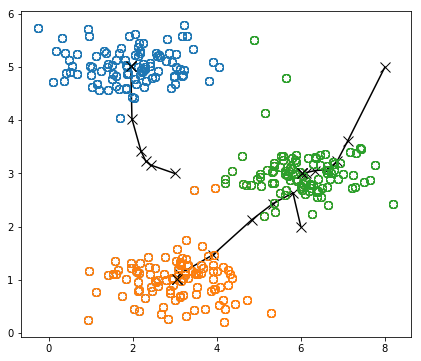

In [48]:
# load data sample
data = loadmat('ex7data2.mat')
X = data['X']

# K-means parameters
K = 3
max_iters = 10
init_c = np.array([[3, 3], [6, 2], [8, 5]])

# run K-means
centroids, idx = runKmeans(X, init_c, max_iters, True)



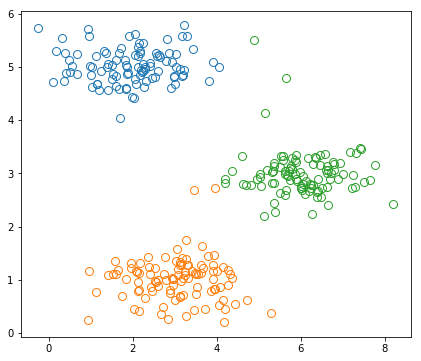

In [34]:
fig, ax = plt.subplots(figsize=(7, 6))
plotDataPoints(X, idx, K, ax)